In [1]:
from qualifying_script import get_qualifying_data, plot_qualifying_drivers, plot_time_diff_by_constructor

In [2]:
# Qualifying Analysis

In [3]:
bahrain_qualifying = get_qualifying_data("British Grand Prix", 2024, ["q1", "q2", "q3"])

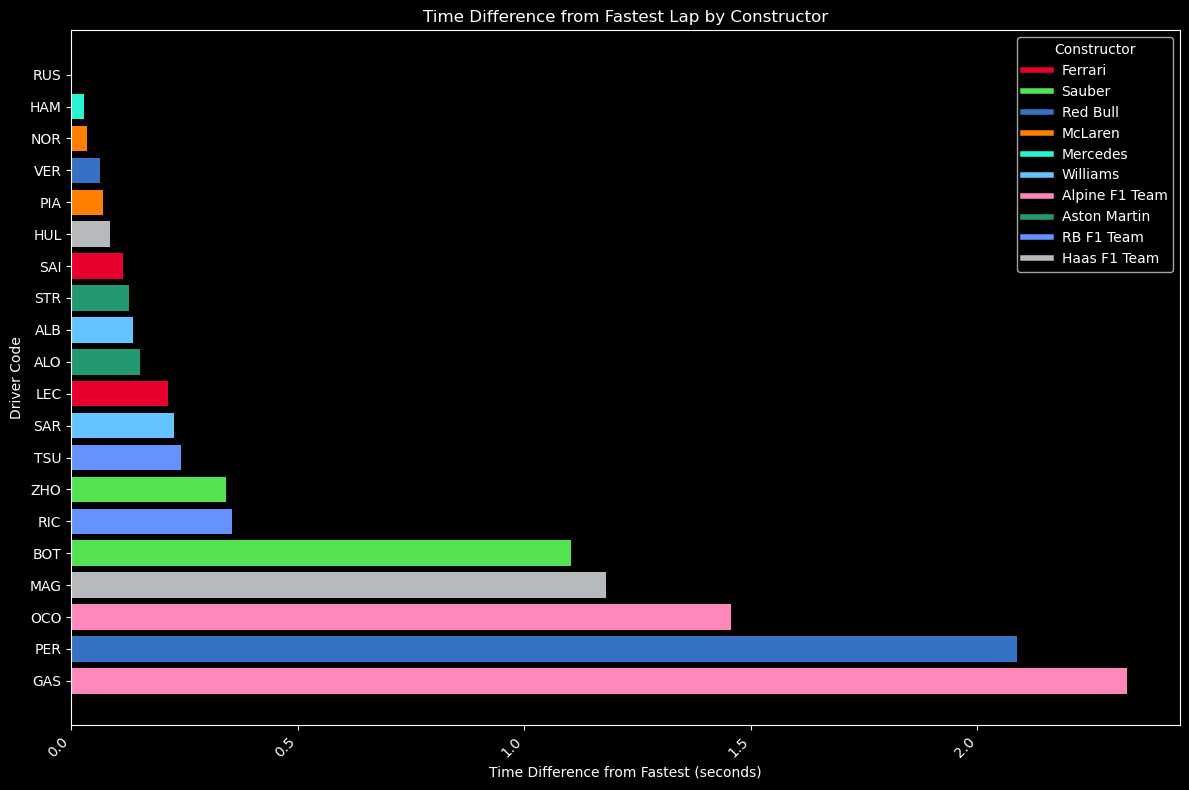

In [4]:
plot_qualifying_drivers(bahrain_qualifying)

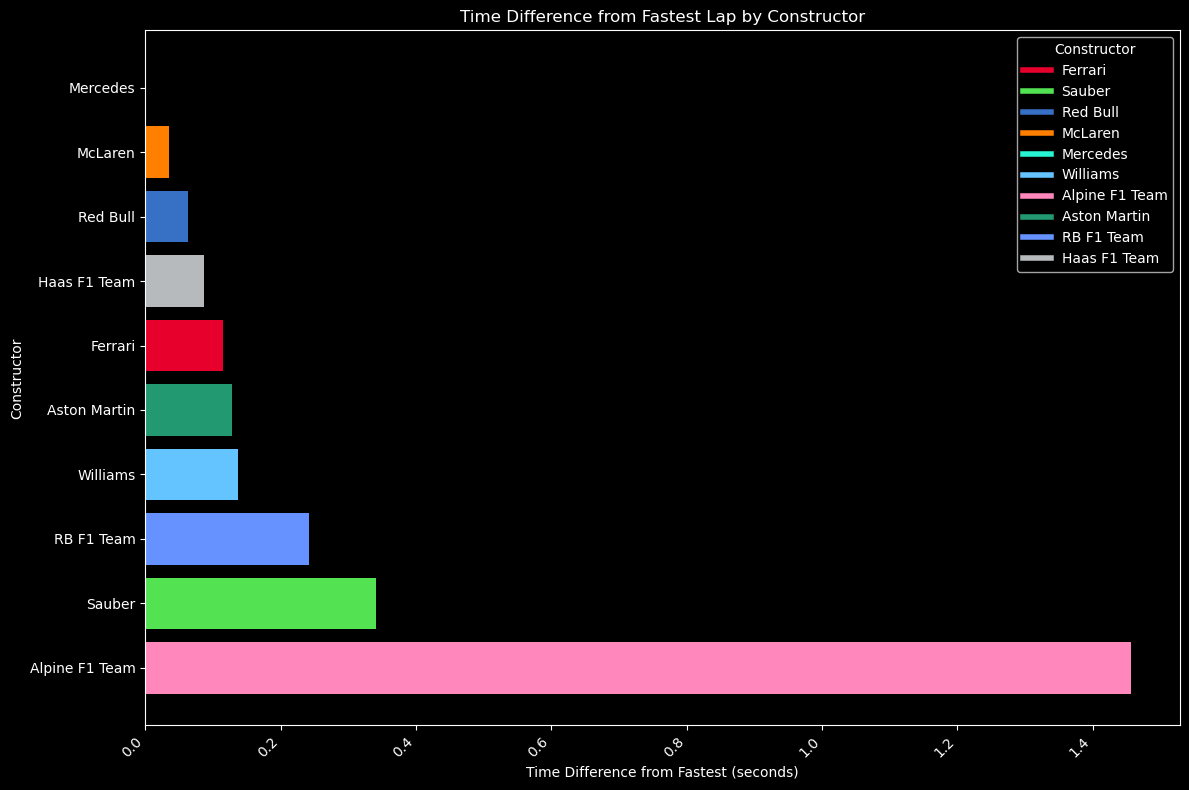

In [5]:
plot_time_diff_by_constructor(bahrain_qualifying)